# Week 5: Streamlining Code

Today, we will: 
- Extract data from CSV to create a `geopandas.GeoDataFrame`
- Do more customizations for maps and matplotlib figures
- Go over strategies to streamline code

In [6]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype

import geopandas as gpd

import matplotlib.pyplot as plt

# Set up display options when looking at data frames
pd.set_option("display.max.columns", None)


In [9]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv' ## CSV
power_plants = pd.read_csv(URL)
power_plants.head()

# Drop first column 
power_plants = power_plants.drop(columns = "Unnamed: 0")


In [10]:
# Import states data
fp = os.path.join("data",'data 2','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names
states.columns= states.columns.str.lower()
states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


## CSV to geopandas.GeoDataFrame
The power plants file is a CSV. Unlike shapefiles, `geopandas` don't have a way to extract a geometry column from CSV.So, we need to specify this manually. 

We will use latitude and longitude columns in the CSV, then indicate the location of the power plants in NAD83 CRS. 

In [17]:
# Create points from latitiude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                   power_plants.latitude)

# Create at the geodataframe

In [ ]:
power_plants = gpd.GeoDataFrame(power_plants, 
                 geometry = points, # specify geometry column
                 crs = "EPSG:4269")

<Axes: >

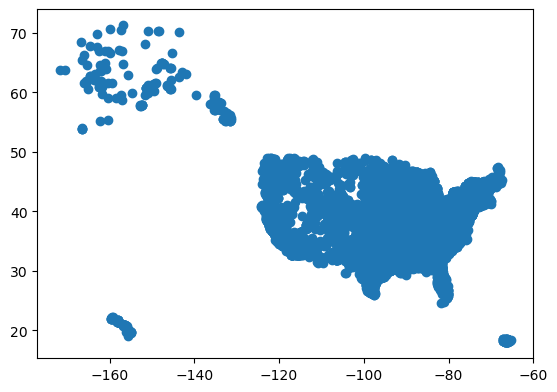

In [19]:
power_plants.plot()

## f-strings 
We have printed variables using string concatenation inside `print()` writing commas between every string and variable we want to print.

In [25]:
print(f"Hello world")

# Example: Explore more about CRS 
print(f"Ellipsoid: {power_plants.crs.ellipsoid}")
print(f"Datum: {power_plants.crs.datum}")

# Another example 
print(f"{'Is the CRS geographic?': <25}{power_plants.crs.is_geographic}")

Hello world
Ellipsoid: GRS 1980
Datum: North American Datum 1983
Is the CRS geographic?   True


## Explore the TIGER shapefile

In [26]:
states.tail()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
51,1,1,25,00606926,25,MA,Massachusetts,00,G4000,A,20204341720,7130708927,+42.1565196,-071.4895915,"POLYGON ((-71.25515 42.73655, -71.25510 42.736..."
52,3,5,51,01779803,51,VA,Virginia,00,G4000,A,102258178227,8528072639,+37.5222512,-078.6681938,"POLYGON ((-76.49150 36.55065, -76.49388 36.550..."
53,3,5,11,01702382,11,DC,District of Columbia,00,G4000,A,158316184,18709787,+38.9042474,-077.0165167,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
54,2,4,19,01779785,19,IA,Iowa,00,G4000,A,144659596400,1086089872,+42.0700243,-093.4933473,"POLYGON ((-95.86095 43.50004, -95.85979 43.500..."
55,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294365853885,853990728,+34.2039362,-111.6063449,"POLYGON ((-110.75069 37.00301, -110.74193 37.0..."


EPSG:4269


<Axes: >

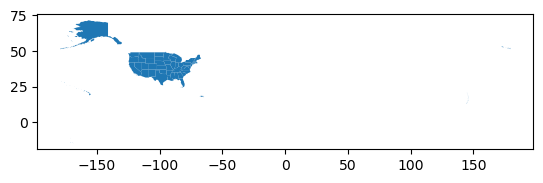

In [27]:
print(states.crs)
states.plot()

## for loops 
Example: It can be easier to work with codes as numbers instead of strings. Update the corresponding columnsin the states geo.DataFrame.

In [ ]:
print(f"Region is string type? {is_string_dtype(states['region'])}")
print(f"Division is string type? {is_string_dtype(states['division'])}")
print(f"Statefp is string type? {is_string_dtype(states['statefp'])}")

Region is string type? True
Division is string type? True
Statefp is string type? True


In [36]:
# Use a for loop instead of copy-pasting individually 
code_cols = ["region","division", "statefp"]
for col in code_cols:
    #print(cols) 
    print(f"{col} is string type? {is_string_dtype(states[col])}")


region is string type? True
division is string type? True
statefp is string type? True


**DRY code** = Don't repeat youself 
This is a code programming principle to reduce redundancy and consolidation. 

If this is repeated more than twice, then we would likely need a for loop. 

## `assert`
`assert` does nothing if the expression next to it evaluates to True and it raises an "AssertionError" exception and stops tour code from running further if not.

In [39]:
# Raise error if statement is false 
assert 2+2 == 3

AssertionError: 

# Update code columns into integers
# Workflow for updating the data type of code columns to be integers. 
for each column in code_columns: 

    convert column to numeric 
    
    check if column is numeric using assert

In [41]:
for column in code_cols: 
    states[column] = states[column].astype("int")
    assert is_numeric_dtype(states[column])